In [49]:
import numpy as np
import pandas as pd
import random 

In [50]:
import pygad
import matplotlib.pyplot as plt

# Inicijalizacija podataka(tačaka):

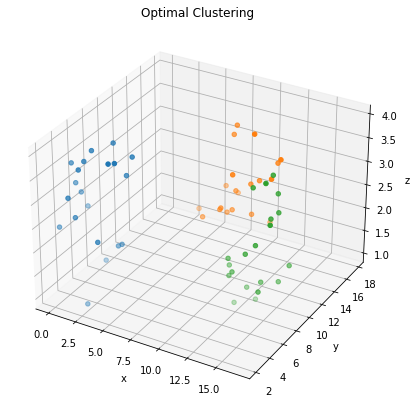

In [51]:
cluster1_num_samples = 20
cluster1_x1_start = 0
cluster1_x1_end = 5
cluster1_x2_start = 2
cluster1_x2_end = 6
cluster1_x3_start = 1
cluster1_x3_end = 4
cluster1_x1 = np.random.random(size=(cluster1_num_samples))
cluster1_x1 = cluster1_x1 * (cluster1_x1_end - cluster1_x1_start) + cluster1_x1_start
cluster1_x2 = np.random.random(size=(cluster1_num_samples))
cluster1_x2 = cluster1_x2 * (cluster1_x2_end - cluster1_x2_start) + cluster1_x2_start
cluster1_x3 = np.random.random(size=(cluster1_num_samples))
cluster1_x3 = cluster1_x3 * (cluster1_x3_end - cluster1_x3_start) + cluster1_x3_start

cluster2_num_samples = 20
cluster2_x1_start = 4
cluster2_x1_end = 12
cluster2_x2_start = 14
cluster2_x2_end = 18
cluster2_x3_start = 1
cluster2_x3_end = 4
cluster2_x1 = np.random.random(size=(cluster2_num_samples))
cluster2_x1 = cluster2_x1 * (cluster2_x1_end - cluster2_x1_start) + cluster2_x1_start
cluster2_x2 = np.random.random(size=(cluster2_num_samples))
cluster2_x2 = cluster2_x2 * (cluster2_x2_end - cluster2_x2_start) + cluster2_x2_start
cluster2_x3 = np.random.random(size=(cluster2_num_samples))
cluster2_x3 = cluster2_x3 * (cluster2_x3_end - cluster2_x3_start) + cluster2_x3_start

cluster3_num_samples = 20
cluster3_x1_start = 12
cluster3_x1_end = 18
cluster3_x2_start = 6
cluster3_x2_end = 9
cluster3_x3_start = 1
cluster3_x3_end = 4
cluster3_x1 = np.random.random(size=(cluster3_num_samples))
cluster3_x1 = cluster3_x1 * (cluster3_x1_end - cluster3_x1_start) + cluster3_x1_start
cluster3_x2 = np.random.random(size=(cluster3_num_samples))
cluster3_x2 = cluster3_x2 * (cluster3_x2_end - cluster3_x2_start) + cluster3_x2_start
cluster3_x3 = np.random.random(size=(cluster3_num_samples))
cluster3_x3 = cluster3_x3 * (cluster3_x3_end - cluster3_x3_start) + cluster3_x3_start

c1 = np.array([cluster1_x1, cluster1_x2, cluster1_x3]).T
c2 = np.array([cluster2_x1, cluster2_x2, cluster2_x3]).T
c3 = np.array([cluster3_x1, cluster3_x2, cluster3_x3]).T

# c1 = np.array([cluster1_x1, cluster1_x2]).T
# c2 = np.array([cluster2_x1, cluster2_x2]).T
# c3 = np.array([cluster3_x1, cluster3_x2]).T


data = np.concatenate((c1, c2, c3), axis=0)

#fig,ax=plt.subplots(figsize=(16,7))

#dodato
fig=plt.figure(figsize=(16,7))
ax=fig.add_subplot(111,projection='3d')
ax.set_title("Klasterovanje tacaka genetskim algoritmom(3D): ")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
#dodato_kraj 
ax.scatter(cluster1_x1, cluster1_x2, cluster1_x3)
ax.scatter(cluster2_x1, cluster2_x2, cluster2_x3)
ax.scatter(cluster3_x1, cluster3_x2, cluster3_x3)

# plt.scatter(cluster1_x1, cluster1_x2)
# plt.scatter(cluster2_x1, cluster2_x2)
# plt.scatter(cluster3_x1, cluster3_x2)

plt.title("Optimal Clustering")
plt.show()






In [52]:
points0=data.tolist()


# za cuvanje random tacaka

# with open(r'savedInput1.txt', 'w') as fp:
#     for item in points0:
#         # write each item on a new line
#         fp.write("%s\n" % item)
#     print('Done')

points0

[[1.1828250101713995, 2.543738128992965, 3.1328026937379416],
 [0.741562408725851, 4.848148953114427, 2.943996052063907],
 [2.672497923196364, 5.106368654854083, 1.592284867545334],
 [4.481563959240128, 4.669712402207365, 2.1196850265077143],
 [0.4195510983530948, 4.623729979645002, 3.1429884758407867],
 [4.325198784041183, 3.336644942370313, 3.9392896268656967],
 [4.783529435162324, 5.799056660876142, 3.813953311498333],
 [4.647887102646679, 3.672665591378243, 3.92988100747907],
 [1.6289388594525405, 2.765656164575895, 2.7304298085312038],
 [0.1303420739554073, 4.540280207185175, 3.5452376978035907],
 [0.824325704340152, 5.536962724057188, 2.567544396034361],
 [1.5090488939577167, 3.5023427992236207, 3.615754025362172],
 [3.977430903974833, 2.242647680349228, 2.4477400495625554],
 [1.544261169600503, 4.191670545666836, 3.7074606484873334],
 [4.472138253785531, 5.454401080276838, 3.4553247302329417],
 [2.8139797568688723, 2.342306830622997, 1.0350514823883998],
 [1.9129094656453538, 4.

# Reprezentacija jedinke:

In [53]:
class Individual:
    def __init__(self,points,num_clusters):
        #inicijalizujemo jedinke kao listu slucajnoodabranih tacaka duzine broja klastera:
        self.code=[points[random.randrange(len(points))] for _ in range(num_clusters)] 
        self.fitness = self.calcFitness(points,num_clusters)
        #self.centroids=self.calculateCentroids(points)
        
    def __lt__(self, other):
        return self.fitness < other.fitness
    
    
    def ed(self,a,b):
        a=np.array(a)
        b=np.array(b)
        dist=np.linalg.norm(a-b)
        
        return dist
    #odredjuje kom klasteru pripada tacka point:
    def cluster_id(self,point,centers):
        d=float('inf')
        index=-1
        best_d=float('inf')
        
        for i,c in enumerate(centers):
            new_d=self.ed(point,c)
            if new_d<best_d:
                best_d=new_d
                index=i
   
        return index
        
    def sse_partial(self,points,cluster_index):
        #s=0
        sc=0
        
        for p in points:
            if self.cluster_id(p,self.code)==cluster_index:
                sc+=(self.ed(p,self.code[cluster_index]))**2
                #if p[-1]==cluster_index:
            
        return sc
    
    #SSE(Sum squared error)-metrika koju koristimo za racunanje fitness-a
    def sse(self,points,num_clusters):
        s=0
        for k in range(num_clusters):
            s+=self.sse_partial(points,k)
        
        return s
   

    def calcFitness(self,points,num_clusters):
        
        error=self.sse(points,num_clusters)
        fitness=1/error
        
        return fitness


In [54]:
def readFile(filename):
    with open(filename, 'r') as f:
        num_points,dim=[int(x) for x in f.readline().split()]
        points=[[float(x) for x in f.readline().split()] for _ in range(num_points)]
        return points

In [55]:
# points=readFile("input2.txt")
# points=readFile("input3.txt")
# points=readFile("input_test.txt")

In [56]:
# points

In [57]:
import copy

points = copy.deepcopy(points0)
points1 = copy.deepcopy(points0)

# points=copy.deepcoppointsts)

In [58]:
num_points=len(points)
num_dimensions=len(points[0])
print(num_points,num_dimensions)

60 3


In [59]:
#Eucledian distance-Euklidsko rastojanje
def ed(a,b):
    a=np.array(a)
    b=np.array(b)
    dist=np.linalg.norm(a-b)
    return dist

In [60]:
print(ed(points[1],points[2]))

2.371141603060143


In [61]:
def cluster_id(point,centers):
    d=float('inf')
    index=-1
    best_d=float('inf')
    for i,c in enumerate(centers):
        new_d=ed(point,c)
        if new_d<best_d:
            best_d=new_d
            index=i
            
    return index

In [62]:
def crossover(parent1,parent2,child1,child2):
    breakpoint = random.randrange(len(parent1.code))
    
    child1.code[:breakpoint] = parent1.code[:breakpoint]
    child2.code[:breakpoint] = parent2.code[:breakpoint]
    
    child1.code[breakpoint:] = parent2.code[breakpoint:]
    child2.code[breakpoint:] = parent1.code[breakpoint:]
    
    #print(breakpoint)

In [63]:
def selection(population):
    
    TOURNAMENT_SIZE = 5
    bestFitness = float('-inf')
    index = -1
    for i in range(TOURNAMENT_SIZE):
        randomIndividual = random.randrange(len(population))
        if population[randomIndividual].fitness > bestFitness:
            bestFitness = population[randomIndividual].fitness
            index = randomIndividual
    return index
    
    
    #biramo random predstavnika za svaki klaster
    #koji ce se vremenom unaprediti i tako ce napredovati ceo proces

In [64]:
def mutation(individual):
    #alfa=random vrednost kojom ce se za neki vektor pomeriti trenutni centar klastera
    #c_a =random int koji uz alfa utice na pomeraj centra
    #kao parametar/verovatnocu mutacije uzimamo 5% (MUTATION_RATE=0.05)
    MUTATION_PROB=0.05
    
    for i in range(len(individual.code)):
        l=np.array(individual.code[i])
        alpha=random.uniform(0,1)
        c_a=random.randint(0,3)
        znak=random.uniform(0,1)
        if random.random()<MUTATION_PROB:
            if znak>=0.5:
                l=l+(alpha*c_a)
                l=np.round(l,2)
                individual.code[i]=l.tolist()
            else:
                l=l - (alpha*c_a)
                l=np.round(l,2)
                individual.code[i]=l.tolist()
    

In [65]:
# points=data.tolist()

# Parametri genetskog algoritma:


In [66]:
POPULATION_SIZE = 100
NUM_GENERATIONS = 30
ELITISIM_SIZE = POPULATION_SIZE // 5
num_clusters=3

In [67]:

population = [Individual(points,num_clusters) for _ in range(POPULATION_SIZE)]
newPopulation = [Individual(points,num_clusters) for _ in range(POPULATION_SIZE)]

for i in range(NUM_GENERATIONS):
    population.sort(reverse=True)
    newPopulation[:ELITISIM_SIZE] = population[:ELITISIM_SIZE]
    
    for j in range(ELITISIM_SIZE, POPULATION_SIZE, 2):
        
        parent1Index = selection(population)
        parent2Index = selection(population)
        
        crossover(population[parent1Index], population[parent2Index], newPopulation[j], newPopulation[j+1])
        
        #print(j)
        #print(population[parent1Index].code)
        #print(population[parent2Index].code)
        mutation(newPopulation[j])
        mutation(newPopulation[j+1])
        
        newPopulation[j].fitness = newPopulation[j].calcFitness(points,num_clusters)
        newPopulation[j+1].fitness = newPopulation[j+1].calcFitness(points,num_clusters)
        
#         print(j)
#         print(newPopulation[j].code)
#         print(newPopulation[j+1].code)
#         print()
#         print()
        
    population = newPopulation

    
bestIndividual = max(population)
print(f'solution: {bestIndividual.code}, fitness: {bestIndividual.fitness}')

solution: [[2.45, 3.59, 3.55], [7.9, 16.09, 2.21], [15.04, 7.01, 2.4]], fitness: 0.0033660973916422314


In [68]:
cluster_centers=copy.deepcopy(bestIndividual.code)

In [69]:
#Svakoj tacki skupa Points dodajemo kao poslednji element redni broj klastera kome bi trebalo da odgovaraju
def assign_center(points,centers):
    best_d=float("inf")
    ind=-1
    n=len(points[0])
    
    for p in points:
        best_d=float('inf')
        for j,c in enumerate(centers):
            if(len(p)==n and len(c)==n):
                d_new=ed(p,c)
            
                if d_new<best_d:
                    ind=j
                    best_d=d_new    
                    
        p.append(ind)
        

In [70]:
print(points[0],points[-1])


[1.1828250101713995, 2.543738128992965, 3.1328026937379416] [12.105257392876263, 7.720000260784885, 1.8184290935963396]


In [71]:
assign_center(points,cluster_centers)
# points

In [72]:
print(points[0],points[-1])


[1.1828250101713995, 2.543738128992965, 3.1328026937379416, 0] [12.105257392876263, 7.720000260784885, 1.8184290935963396, 2]


In [73]:
#pravimo matricu u kojoj svaki red predstavlja listu tacaka za svaki klaster redom
def create_cluster_arrays(points,centers):
    a=[]
    b=[]
    c=[]
    M=[]
    num_clusters=len(centers)
    for p in points:
        if p[-1]==0:
            a.append(p)
    
    #a=np.array(a)
    
    for p in points:
        if p[-1]==1:
            b.append(p)
    
    #b=np.array(a)
#     M=np.vstack((a,b))
    M.append(a)
    M.append(b)
    
    for i in range(2,num_clusters): 
        c.clear()
        for p in points:
            if p[-1]==i and i!=0 and i!=1:
                c.append(p)
#         c=np.array(c)        
        M.append(c)
    
    return M

In [74]:
M=create_cluster_arrays(points,cluster_centers)
#M

In [75]:
points=sorted(points,key=lambda x: x[-1])

In [76]:
from operator import itemgetter
from itertools import groupby

In [77]:
M=[list(j) for i,j in groupby(points,key=itemgetter(num_dimensions))]
M

[[[1.1828250101713995, 2.543738128992965, 3.1328026937379416, 0],
  [0.741562408725851, 4.848148953114427, 2.943996052063907, 0],
  [2.672497923196364, 5.106368654854083, 1.592284867545334, 0],
  [4.481563959240128, 4.669712402207365, 2.1196850265077143, 0],
  [0.4195510983530948, 4.623729979645002, 3.1429884758407867, 0],
  [4.325198784041183, 3.336644942370313, 3.9392896268656967, 0],
  [4.783529435162324, 5.799056660876142, 3.813953311498333, 0],
  [4.647887102646679, 3.672665591378243, 3.92988100747907, 0],
  [1.6289388594525405, 2.765656164575895, 2.7304298085312038, 0],
  [0.1303420739554073, 4.540280207185175, 3.5452376978035907, 0],
  [0.824325704340152, 5.536962724057188, 2.567544396034361, 0],
  [1.5090488939577167, 3.5023427992236207, 3.615754025362172, 0],
  [3.977430903974833, 2.242647680349228, 2.4477400495625554, 0],
  [1.544261169600503, 4.191670545666836, 3.7074606484873334, 0],
  [4.472138253785531, 5.454401080276838, 3.4553247302329417, 0],
  [2.8139797568688723, 2.3

# K-Means algoritam za skup points:

In [78]:
#######################################################################
#k means

X = pd.DataFrame(points1)
X[1][0]

2.543738128992965

In [79]:
from sklearn.cluster import KMeans

In [80]:
kmeans = KMeans(n_clusters=num_clusters, init='k-means++')

In [81]:
kmeans.fit(X)

KMeans(n_clusters=3)

In [82]:
kmeans.cluster_centers_

array([[ 2.46220026,  4.16881051,  3.00237065],
       [14.56797177,  7.52468908,  2.35082834],
       [ 8.20362648, 15.91025757,  2.19685504]])

In [83]:
kmeans.labels_


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [84]:
# uporedjeni centri dva algoritma
# dodata promenljiva ispod
print("Centri genetskog algoritma: ")
print(cluster_centers)
print()
print("Centri algoritma k sredina: ")
print(kmeans.cluster_centers_)

Centri genetskog algoritma: 
[[2.45, 3.59, 3.55], [7.9, 16.09, 2.21], [15.04, 7.01, 2.4]]

Centri algoritma k sredina: 
[[ 2.46220026  4.16881051  3.00237065]
 [14.56797177  7.52468908  2.35082834]
 [ 8.20362648 15.91025757  2.19685504]]


In [85]:
k_means_centers=[]
for i in kmeans.cluster_centers_:
    k_means_centers.append(list(i))
    
k_means_centers

[[2.462200260103603, 4.168810512335272, 3.0023706518677207],
 [14.567971772945835, 7.524689077150322, 2.3508283372815786],
 [8.203626479747436, 15.910257572919646, 2.1968550433814173]]

In [86]:
k_individual=Individual(points1,num_clusters)

In [87]:
k_individual.code=k_means_centers
k_means_fitness=k_individual.calcFitness(points1,num_clusters)
print("K_means_fitness:")
print(k_means_fitness)

K_means_fitness:
0.0036753555607199908


# ISCRTAVANJE DOBIJENIH KLASTERA I NJIHOVIH CENTARA:

In [88]:
import matplotlib.pyplot as plt

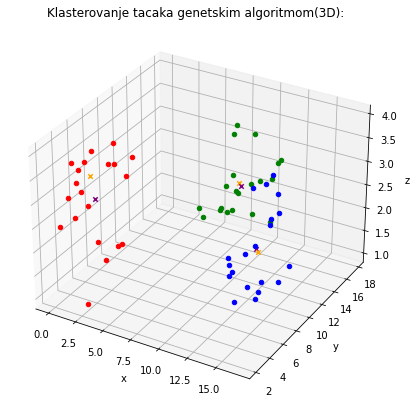

In [89]:
if num_dimensions==2:
    fig,ax=plt.subplots(figsize=(16,7))
    ax.set_title("Klasterovanje tacaka genetskim algoritmom(2D): ")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    
    colors=["red","green","black","yellow","blue"]
    for i in range(num_clusters):
        for j in range(len(M[i])):
            plt.scatter(((M[i])[j])[0],((M[i])[j])[1],c=colors[i])

    for j in range(num_clusters):
        plt.scatter((cluster_centers[j])[0],(cluster_centers[j])[1],c="orange",marker="x")
        
    
    for j in range(num_clusters):
        plt.scatter((k_means_centers[j])[0],(k_means_centers[j])[1],c="purple",marker="x")
        
elif num_dimensions==3:
    fig=plt.figure(figsize=(16,7))
    ax=fig.add_subplot(111,projection='3d')
    ax.set_title("Klasterovanje tacaka genetskim algoritmom(3D): ")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    colors=["red","green","blue","yellow","black"]
    for i in range(num_clusters):
        for j in range(len(M[i])):
            ax.scatter(((M[i])[j])[0],((M[i])[j])[1],((M[i])[j])[2],c=colors[i])

    for j in range(num_clusters):
        ax.scatter((cluster_centers[j])[0],(cluster_centers[j])[1],(cluster_centers[j])[2],c="orange",marker="x")
        
    
    for j in range(num_clusters):
        ax.scatter((k_means_centers[j])[0],(k_means_centers[j])[1],(k_means_centers[j])[2],c="purple",marker="x")